## Todo 

- get ig id
- download the dataset using instaloader 
- define feature extractor (features should be 1D vector)
- if the features are more than 1000 use PCA to reduce the dimensionality
- if the features are less than 100 use TSNE 
- plot the t-SNE visualisatoin
- plot the grid view of t-SNE visualisation

In [13]:
# Import libraries
from pathlib import Path
import zipfile
import cv2 
import numpy as np

## Get instagram id

In [1]:
ig_id = "withluke"

In [10]:
google_colab = False

if google_colab:
  image_dir = Path(f"/content/{ig_id}")
  !git clone https://github.com/Quasimondo/RasterFairy
  
else: 
  image_dir = Path(ig_id)
  

## Download the dataset 

In [2]:
with zipfile.ZipFile(f"{ig_id}.zip", 'r') as zip_ref:
    zip_ref.extractall("")

In [17]:
# Specify the list of file types
image_file_types = [".jpg", ".png"]

# List all file paths in the directory if the file type is in the specified list
image_file_paths = [str(file_path) for file_path in image_dir.iterdir() if file_path.is_file() and file_path.suffix.lower() in image_file_types]

## Define the feature extractor

In [15]:
def feature_extractor(image_file_path, number_clusters=3):

    img = cv2.imread(image_file_path)
    img = cv2.resize(img, (224, 224))
    height, width, _ = np.shape(img)

    data = np.reshape(img, (height * width, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)

    rgb_values = []

    for index, row in enumerate(centers):
        rgb_values.append(row)

    rgb_values = np.array(rgb_values)
    
    rgb_values = rgb_values.flatten()    
    return rgb_values

In [20]:
number_colors = 1

In [24]:
sample_feature_array = feature_extractor(image_file_paths[0],number_clusters = number_colors)

In [23]:
# extract features for all images
features_array = []

for i,image_path in enumerate(image_file_paths):
  features_array.append(feature_extractor(image_path,number_clusters=number_colors))
  print(image_path)
  if i % 10 == 0:
    print(i, "done")

withluke\2019-08-17_18-56-00_UTC.jpg
0 done
withluke\2019-08-18_17-37-55_UTC.jpg
withluke\2019-08-19_18-16-17_UTC.jpg
withluke\2019-08-20_19-39-23_UTC.jpg
withluke\2019-08-21_19-44-02_UTC.jpg
withluke\2019-08-22_19-22-23_UTC.jpg
withluke\2019-08-23_19-08-24_UTC.jpg
withluke\2019-08-24_19-47-04_UTC.jpg
withluke\2019-08-25_18-42-23_UTC.jpg
withluke\2019-08-26_18-53-24_UTC.jpg
withluke\2019-08-27_18-46-32_UTC.jpg
10 done
withluke\2019-08-28_20-17-41_UTC.jpg
withluke\2019-08-29_19-46-25_UTC.jpg
withluke\2019-08-30_19-50-42_UTC.jpg
withluke\2019-09-02_17-34-31_UTC.jpg
withluke\2019-09-03_18-24-38_UTC.jpg
withluke\2019-09-05_18-41-52_UTC.jpg
withluke\2019-09-06_18-38-13_UTC.jpg
withluke\2019-09-07_18-43-16_UTC.jpg
withluke\2019-09-08_17-10-00_UTC.jpg
withluke\2019-09-09_18-07-01_UTC.jpg
20 done
withluke\2019-09-10_17-35-55_UTC.jpg
withluke\2019-09-11_19-34-42_UTC.jpg
withluke\2019-09-12_18-27-28_UTC.jpg
withluke\2019-09-13_16-17-03_UTC.jpg
withluke\2019-09-14_17-47-49_UTC.jpg
withluke\2019-0

In [27]:
features_array = np.array(features_array)

## Use PCA if no features are more than 1000

In [26]:
print(f"Number components in the features array : {features_array.shape[1]}")

Number components in the features array : 3


In [28]:
if features_array.shape[1] > 1000:
  use_pca = True
  n_pca_components = 300
else: 
  use_pca = False 
  n_pca_components = 6

In [29]:
use_pca

False

In [30]:
if use_pca:
  from sklearn.decomposition import PCA
  from scipy.spatial import distance
  import random
  import numpy as np
  from PIL import Image
  from matplotlib import pyplot as plt
  
  pca = PCA(n_components=n_pca_components)
  pca.fit(features_array)
  
  pca_features = pca.transform(features_array)
  features_array = pca_features  

## Otherwise straightaway go to TSNE

## Plot the t-SNE visualisation

## Plot the grid view of t-SNE visualisation

In [51]:
# Using Pillow
def load_image_array(image_path, output_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(output_size)
    image = np.array(image)
    return image

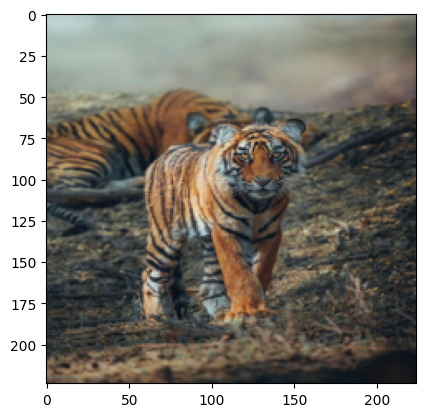

In [52]:
import random
from matplotlib import pyplot as plt
from PIL import Image

# grab a random query image
# query_image_idx = int(len(image_file_paths) * random.random())
query_image_idx = 2011

# let's display the image
img = load_image_array(image_file_paths[query_image_idx])
plt.imshow(img)

In [39]:
query_image_idx

2011

In [42]:
features_array[query_image_idx]

array([ 88.13457 ,  98.676315, 103.374596], dtype=float32)

Two similar images have similar content, resulting less cosine distance

In [53]:
from scipy.spatial import distance

# cosine distance to every other image with respective to query image
similar_idx = [distance.cosine(features_array[query_image_idx], feat) for feat in features_array]

In [54]:
# gives a list and sorts the indices of the image features according to the cosine similarity
# Here starting index is 1 not 0, because when compared the query image with itself will return 0 resulting the minimum value
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

In [55]:
idx_closest

[2448, 1502, 1882, 2452, 2449]

____

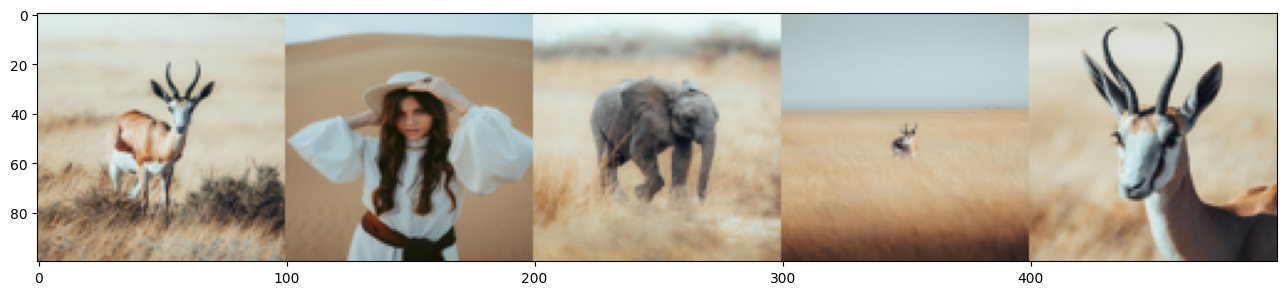

In [56]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = load_image_array(image_file_paths[idx], output_size=(100, 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize=(16, 12))
plt.imshow(concat_image)
plt.show()

In [60]:
pca_features = features_array

In [58]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
      img = load_image_array(image_file_paths[idx], output_size=(100, 100))
      thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Text(0.5, 1.0, 'result images')

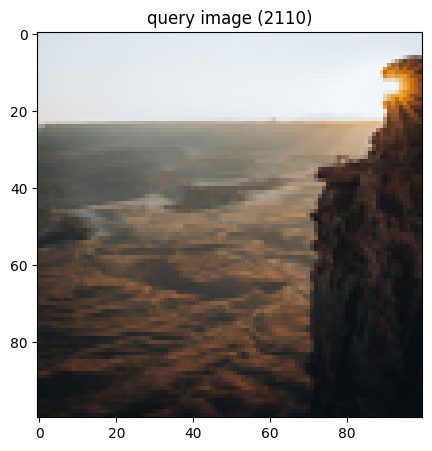

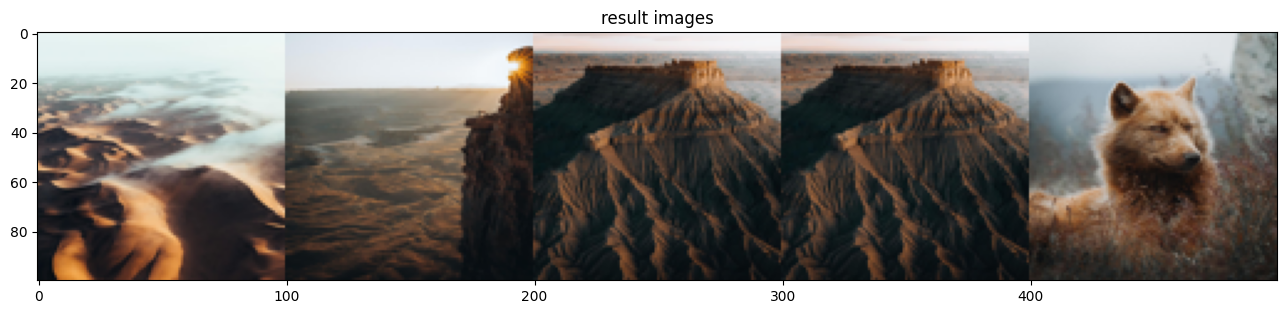

In [61]:
# do a query on a random image
query_image_idx = int(len(image_file_paths) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

In [62]:
pickle_save_file_path = f"{ig_id}_color_3_ig.p"

In [64]:
# save as a pickel file
import pickle

pickle.dump([image_file_paths, pca_features], open(pickle_save_file_path, 'wb'))

In [65]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

### Functions for download files from google drive

In [66]:
# download using python "https://drive.google.com/file/d/10acua5PB1PX9jnnSjFSyFBdTCmGXbteA/view?usp=sharing" without using gdown 
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)
    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None
  
def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
# download_file_from_google_drive("10acua5PB1PX9jnnSjFSyFBdTCmGXbteA", f"{ig_id}_color_ig.p")


In [ ]:
import pickle
ig_id = "sasika"
image_file_paths, pca_features, pca = pickle.load(open(f"{ig_id}_color_ig.p", 'rb'))

for img, f in list(zip(image_file_paths, pca_features))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))

image: /content/sasika/image_0.jpg, features: 0.91,19.16,47.57,7.43... 
image: /content/sasika/image_1.jpg, features: -34.54,-20.55,-3.33,-7.39... 
image: /content/sasika/image_10.jpg, features: -29.86,-4.65,19.72,6.45... 
image: /content/sasika/image_100.jpg, features: 7.33,23.04,-27.40,-0.18... 
image: /content/sasika/image_101.jpg, features: 2.04,-10.98,2.92,-4.18... 


d:\Users\Sasika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [68]:
num_images_to_plot = len(image_file_paths)

if len(image_file_paths) >= num_images_to_plot:
    sort_order = sorted(random.sample(range(len(image_file_paths)), num_images_to_plot))
    images = [image_file_paths[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [69]:
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3052 samples in 0.011s...
[t-SNE] Computed neighbors for 3052 samples in 0.084s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3052
[t-SNE] Computed conditional probabilities for sample 2000 / 3052
[t-SNE] Computed conditional probabilities for sample 3000 / 3052
[t-SNE] Computed conditional probabilities for sample 3052 / 3052
[t-SNE] Mean sigma: 3.765491
[t-SNE] Computed conditional probabilities in 0.127s
[t-SNE] Iteration 50: error = 69.8062744, gradient norm = 0.0243711 (50 iterations in 5.103s)
[t-SNE] Iteration 100: error = 64.7603760, gradient norm = 0.0102233 (50 iterations in 7.207s)
[t-SNE] Iteration 150: error = 63.2158813, gradient norm = 0.0087654 (50 iterations in 6.973s)
[t-SNE] Iteration 200: error = 62.4176292, gradient norm = 0.0034079 (50 iterations in 5.928s)
[t-SNE] Iteration 250: error = 61.9564018, gradient norm = 0.0027840 (50 iterations in 6.141s)
[t-SNE] KL divergence after 250 iterati

In [70]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

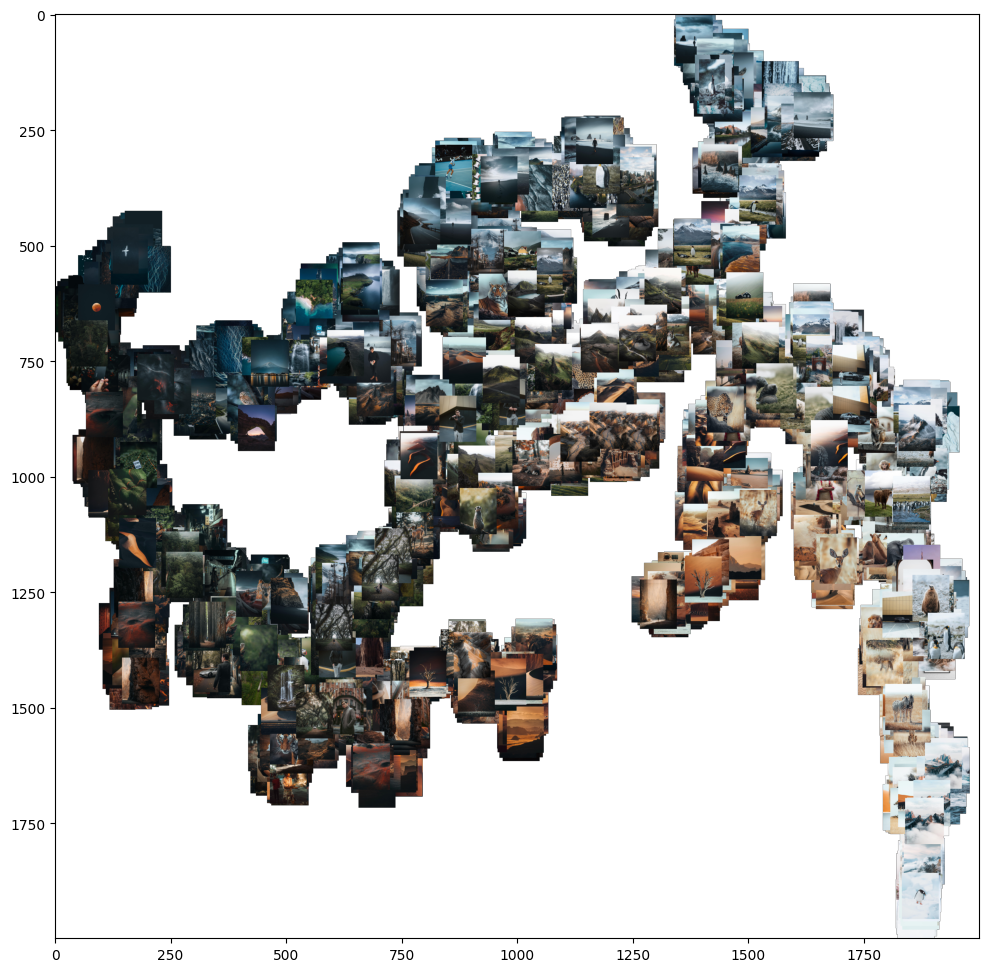

In [71]:
width = height = 2000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)) )
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [72]:
full_image.save(f"{ig_id}_color_1_t_sne_{width}x_color.png")

### Background color 

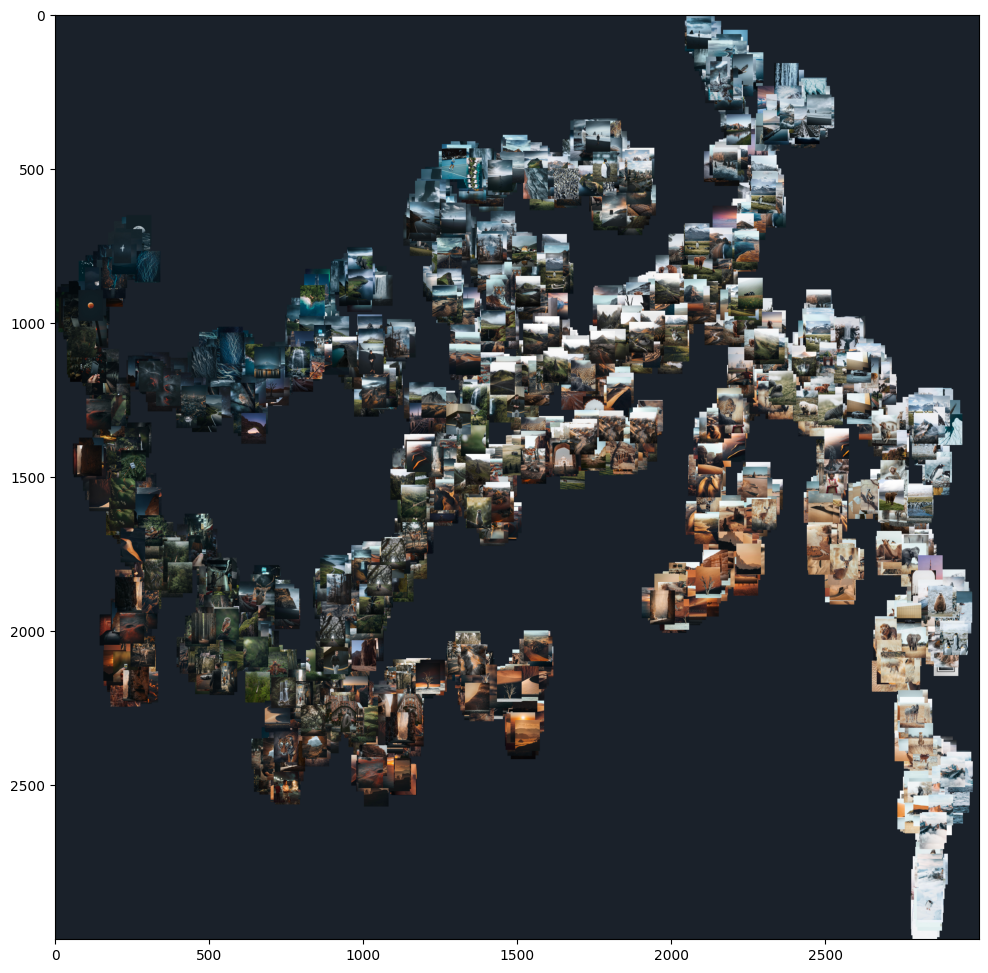

In [96]:
from PIL import Image
import matplotlib.pyplot as plt

width = height = 3000
max_dim = 100
max_dim = 100

# Change the background color to #1A212A
background_color = (26, 33, 42)  # RGB values of #1A212A
full_image = Image.new('RGBA', (width, height), background_color)

for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize=(16, 12))
plt.imshow(full_image)
plt.show()


In [97]:
full_image.save(f"{ig_id}_color_1_t_sne_{width}px_bg_color.png")

____

In [ ]:
break

In [75]:
len(image_file_paths)

3052

In [85]:
3052/40

76.3

In [87]:
74*40

2960

In [91]:
import rasterfairy

# nx * ny = 1000, the number of images
nx = 40
ny = 77

# assign to grid
grid_assignment = rasterfairy.transformPointCloud2D(tsne, target=(nx, ny))

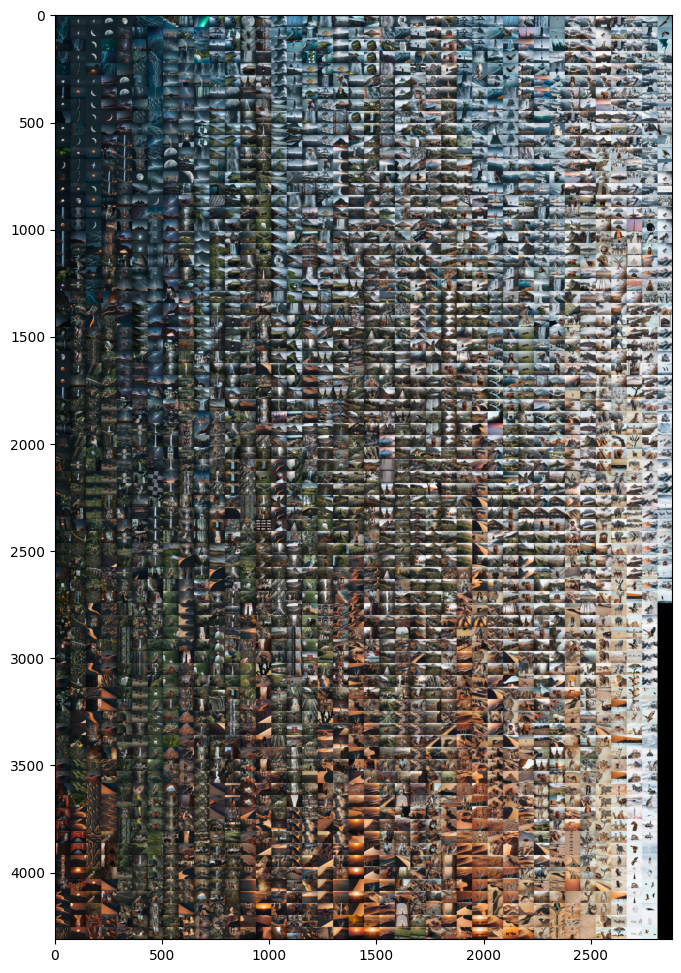

In [92]:
tile_width = 72
tile_height = 56

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGB', (full_width, full_height))

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  # center-crop the tile to match aspect_ratio
    if (tile_ar > aspect_ratio):
        margin = 0.5 * (tile.width - aspect_ratio * tile.height)
        tile = tile.crop((margin, 0, margin + aspect_ratio * tile.height, tile.height))
    else:
        margin = 0.5 * (tile.height - float(tile.width) / aspect_ratio)
        tile = tile.crop((0, margin, tile.width, margin + float(tile.width) / aspect_ratio))
    tile = tile.resize((tile_width, tile_height))
    grid_image.paste(tile, (int(x), int(y)))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(grid_image)

In [93]:
grid_image.save(f"{ig_id}_color_1_grid_{nx}x{ny}_{width}px_t_sne.png")